In [1]:
import torch
import dlc_practical_prologue as prologue
from importlib import reload
reload(prologue)
from dlc_practical_prologue import *
import Module, modules, optimizers, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *
from optimizers import *
torch.set_grad_enabled(False)

train_input, train_target, train_classes, test_input, test_target, test_classes = \
       load_random_datasets()

input = torch.Tensor([[2., 4., 6.], [1., 4., 6.], [0.5, 3., 2.], [4.3, 4., 5.],
                      [1.3, 4.1, 6.4], [1.4, 4.1, 6.5], [5, 4., 6.]])
target = torch.Tensor([[2], [1], [1.1], [3], [1.2], [1.21], [3.4]])
nb_epochs = 5

### Standalone Linear Module

In [2]:
model_lin = Linear('fc1', 3, 1)
print_parameters_as_torch(model_lin)

Parameter containing:
tensor([[-0.4593, -0.5606, -0.0493]])
Parameter containing:
tensor([0.8749])


In [3]:
from torch import nn
torch.set_grad_enabled(True)
model_lin_torch = nn.Linear(3, 1)
set_initial_parameters(model_lin, model_lin_torch)
for param in model_lin_torch.parameters():
    print(param)
del nn
torch.set_grad_enabled(False)

def hook(module, grad_input, grad_output):
    for grad in grad_output:
        print("grad_output = ", grad_output[0].t())
        break

Parameter containing:
tensor([[-0.4593, -0.5606, -0.0493]], requires_grad=True)
Parameter containing:
tensor([0.8749], requires_grad=True)


In [4]:
criterion_lin = MSELoss()
optimizer_lin = SGD(model_lin, lr=0.01)

for e in range(nb_epochs):
    optimizer_lin.zero_grad()
    output_lin = model_lin(input)
    loss_lin = criterion_lin(output_lin, target)
    grad_output_lin = criterion_lin.backward()
    print("e = {}, loss = {}, grad_output = {}".format(e, round(loss_lin.item(), 5), grad_output_lin.t()))
    model_lin.backward(grad_output_lin)
    optimizer_lin.step(loss_lin)
 
print()
from torch import nn
torch.set_grad_enabled(True)
    
model_lin_torch.register_backward_hook(hook)     
criterion_lin_torch = nn.MSELoss()
optimizer_lin_torch = torch.optim.SGD(model_lin_torch.parameters(), lr=0.01)

for e in range(nb_epochs):
    optimizer_lin_torch.zero_grad()
    output_lin_torch = model_lin_torch(input)
    loss_lin_torch = criterion_lin_torch(output_lin_torch, target)
    print("e = {}, loss = {}".format(e, round(loss_lin_torch.item(), 5)))
    loss_lin_torch.backward()
    optimizer_lin_torch.step()
    
del nn
torch.set_grad_enabled(False)

e = 0, loss = 22.67716, grad_output = tensor([[-1.3090, -0.8920, -0.6385, -1.8825, -1.0102, -1.0276, -2.1027]])
e = 1, loss = 1.74668, grad_output = tensor([[ 0.1117,  0.4567,  0.0066, -0.4381,  0.4269,  0.4309, -0.4661]])
e = 2, loss = 1.55039, grad_output = tensor([[ 0.0306,  0.3688, -0.0330, -0.4922,  0.3359,  0.3394, -0.5268]])
e = 3, loss = 1.42432, grad_output = tensor([[ 0.0297,  0.3581, -0.0359, -0.4676,  0.3268,  0.3310, -0.4984]])
e = 4, loss = 1.30902, grad_output = tensor([[ 0.0247,  0.3439, -0.0404, -0.4481,  0.3140,  0.3188, -0.4758]])

e = 0, loss = 22.67716
grad_output =  tensor([[-1.3090, -0.8920, -0.6385, -1.8825, -1.0102, -1.0276, -2.1027]])
e = 1, loss = 1.74668
grad_output =  tensor([[ 0.1117,  0.4567,  0.0066, -0.4381,  0.4269,  0.4309, -0.4661]])
e = 2, loss = 1.55039
grad_output =  tensor([[ 0.0306,  0.3688, -0.0330, -0.4922,  0.3359,  0.3394, -0.5268]])
e = 3, loss = 1.42432
grad_output =  tensor([[ 0.0297,  0.3581, -0.0359, -0.4676,  0.3268,  0.3310, -0.4984]]

### Sequential Module

In [5]:
model_seq = Sequential(
    Linear('fc1', 3, 6), 
    ReLU('relu'),
    Linear('fc2', 6, 1), 
    Tanh())
print_parameters_as_torch(model_seq)

Parameter containing:
tensor([[-0.5055, -0.5256, -0.5978],
        [ 0.3847, -0.6245, -0.4432],
        [-0.5773, -0.9464,  0.2816],
        [ 0.9112, -0.0370, -0.0581],
        [ 0.6176, -0.6392,  0.8895],
        [-0.9584, -0.9219, -0.6092]])
Parameter containing:
tensor([-0.1793, -0.0232, -0.4167, -0.0853,  0.2761, -0.3865])
Parameter containing:
tensor([[ 0.0910,  0.5517, -0.0885, -0.4841, -0.0721,  0.1615]])
Parameter containing:
tensor([0.6264])


In [6]:
import Module, modules, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *

from torch import nn
model_seq_torch = nn.Sequential(
    nn.Linear(3, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
    nn.Tanh())
set_initial_parameters(model_seq, model_seq_torch)
for param in model_seq_torch.parameters():
    print(param)
del nn

Parameter containing:
tensor([[-0.5055, -0.5256, -0.5978],
        [ 0.3847, -0.6245, -0.4432],
        [-0.5773, -0.9464,  0.2816],
        [ 0.9112, -0.0370, -0.0581],
        [ 0.6176, -0.6392,  0.8895],
        [-0.9584, -0.9219, -0.6092]], requires_grad=True)
Parameter containing:
tensor([-0.1793, -0.0232, -0.4167, -0.0853,  0.2761, -0.3865],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0910,  0.5517, -0.0885, -0.4841, -0.0721,  0.1615]],
       requires_grad=True)
Parameter containing:
tensor([0.6264], requires_grad=True)


In [7]:
criterion_seq = MSELoss()
optimizer_seq = SGD(model_seq, lr=0.01)

for e in range(nb_epochs):
    optimizer_seq.zero_grad()
    output_seq = model_seq(input)
    loss_seq = criterion_seq(output_seq, target)
    grad_output_seq = criterion_seq.backward()
    #print(grad_output_seq.shape)
    print("e = {}, loss = {}, grad_output = {}".format(e, round(loss_seq.item(), 5), grad_output_seq.t()))
    model_seq.backward(grad_output_seq)
    optimizer_seq.step(loss_seq)

print()
from torch import nn
torch.set_grad_enabled(True)
    
model_seq_torch.register_backward_hook(hook)     
criterion_seq_torch = nn.MSELoss()
optimizer_seq_torch = torch.optim.SGD(model_seq_torch.parameters(), lr=0.01)

for e in range(nb_epochs):
    optimizer_seq_torch.zero_grad()
    output_seq_torch = model_seq_torch(input)
    loss_seq_torch = criterion_seq_torch(output_seq_torch, target)
    print("e = {}, loss = {}".format(e, round(loss_seq_torch.item(), 5)))
    loss_seq_torch.backward()
    optimizer_seq_torch.step()
    
del nn
torch.set_grad_enabled(False)

e = 0, loss = 6.12547, grad_output = tensor([[-0.6504, -0.2288, -0.1767, -1.1079, -0.3291, -0.3468, -1.2401]])
e = 1, loss = 4.7175, grad_output = tensor([[-0.4679, -0.1149, -0.1506, -1.0112, -0.1725, -0.1816, -1.1643]])
e = 2, loss = 2.7998, grad_output = tensor([[-0.3443, -0.0590, -0.1388, -0.7835, -0.1107, -0.1119, -0.9055]])
e = 3, loss = 1.87299, grad_output = tensor([[-0.3079, -0.0286, -0.1267, -0.6358, -0.0807, -0.0821, -0.7356]])
e = 4, loss = 1.75919, grad_output = tensor([[-0.3021, -0.0220, -0.1221, -0.6134, -0.0747, -0.0763, -0.7148]])

e = 0, loss = 6.12547
grad_output =  tensor([[-0.6504, -0.2288, -0.1767, -1.1079, -0.3291, -0.3468, -1.2401]])
e = 1, loss = 4.7175
grad_output =  tensor([[-0.4679, -0.1149, -0.1506, -1.0112, -0.1725, -0.1816, -1.1643]])
e = 2, loss = 2.7998
grad_output =  tensor([[-0.3443, -0.0590, -0.1388, -0.7835, -0.1107, -0.1119, -0.9055]])
e = 3, loss = 1.87299
grad_output =  tensor([[-0.3079, -0.0286, -0.1267, -0.6358, -0.0807, -0.0821, -0.7356]])
e = 

### Sequential Module with multiple sigmoid and Binary-Cross-Entropy Loss
Idea: check behavior of sigmoid and with multiple parameterless (same) functions without unique names

In [8]:
model_seq_sigmoid = Sequential(
    Linear('fc1', 3, 6), 
    Sigmoid('sig1'),
    Linear('fc2', 6, 1), 
    Sigmoid('sig2'))
print_parameters_as_torch(model_seq_sigmoid)

Parameter containing:
tensor([[ 0.0871, -0.2809, -0.6147],
        [ 0.8904,  0.9812, -0.3240],
        [-0.4314,  0.6022,  0.1325],
        [ 0.4467, -0.3703,  0.1463],
        [ 0.5268,  0.7447,  0.5614],
        [ 0.9037,  0.5998,  0.1722]])
Parameter containing:
tensor([-0.0836, -0.8084,  0.2817, -0.0101,  0.4545,  0.9739])
Parameter containing:
tensor([[ 0.4564,  0.0860,  0.0347, -0.0512, -0.3506,  0.2918]])
Parameter containing:
tensor([-0.5381])


In [9]:
import Module, modules, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *

from torch import nn
model_seq_sigmoid_torch = nn.Sequential(
    nn.Linear(3, 6),
    nn.Sigmoid(),
    nn.Linear(6, 1),
    nn.Sigmoid())
set_initial_parameters(model_seq_sigmoid, model_seq_sigmoid_torch)
for param in model_seq_sigmoid_torch.parameters():
    print(param)
del nn

Parameter containing:
tensor([[ 0.0871, -0.2809, -0.6147],
        [ 0.8904,  0.9812, -0.3240],
        [-0.4314,  0.6022,  0.1325],
        [ 0.4467, -0.3703,  0.1463],
        [ 0.5268,  0.7447,  0.5614],
        [ 0.9037,  0.5998,  0.1722]], requires_grad=True)
Parameter containing:
tensor([-0.0836, -0.8084,  0.2817, -0.0101,  0.4545,  0.9739],
       requires_grad=True)
Parameter containing:
tensor([[ 0.4564,  0.0860,  0.0347, -0.0512, -0.3506,  0.2918]],
       requires_grad=True)
Parameter containing:
tensor([-0.5381], requires_grad=True)


In [10]:
criterion_seq_sigmoid = MSELoss()
optimizer_seq_sigmoid = SGD(model_seq_sigmoid, lr=0.01)

nb_epochs = 10
for e in range(nb_epochs):
    optimizer_seq_sigmoid.zero_grad()
    output_seq_sigmoid = model_seq_sigmoid(input)
    loss_seq_sigmoid = criterion_seq_sigmoid(output_seq_sigmoid, target)
    grad_output_seq_sigmoid = criterion_seq_sigmoid.backward()
    print("e = {}, loss = {}, grad_output = {}".format(e, round(loss_seq_sigmoid.item(), 5), grad_output_seq_sigmoid.t()))
    print("grad_ouput.shape = ", grad_output_seq_sigmoid.shape)
    model_seq_sigmoid.backward(grad_output_seq_sigmoid)
    optimizer_seq_sigmoid.step(loss_seq_sigmoid)

print()
from torch import nn
torch.set_grad_enabled(True)
    
model_seq_sigmoid_torch.register_backward_hook(hook)     
criterion_seq_sigmoid_torch = nn.MSELoss()
optimizer_seq_sigmoid_torch = torch.optim.SGD(model_seq_sigmoid_torch.parameters(), lr=0.01)

for e in range(nb_epochs):
    optimizer_seq_sigmoid_torch.zero_grad()
    output_seq_sigmoid_torch = model_seq_sigmoid_torch(input)
    loss_seq_sigmoid_torch = criterion_seq_sigmoid_torch(output_seq_sigmoid_torch, target)
    print("e = {}, loss = {}".format(e, round(loss_seq_sigmoid_torch.item(), 5)))
    loss_seq_sigmoid_torch.backward()
    optimizer_seq_sigmoid_torch.step()
    
del nn
torch.set_grad_enabled(False)

e = 0, loss = 2.99611, grad_output = tensor([[-0.4641, -0.1784, -0.2038, -0.7501, -0.2356, -0.2385, -0.8650]])
grad_ouput.shape =  torch.Size([7, 1])
e = 1, loss = 2.97189, grad_output = tensor([[-0.4618, -0.1761, -0.2016, -0.7477, -0.2333, -0.2361, -0.8626]])
grad_ouput.shape =  torch.Size([7, 1])
e = 2, loss = 2.94754, grad_output = tensor([[-0.4594, -0.1738, -0.1993, -0.7453, -0.2309, -0.2338, -0.8602]])
grad_ouput.shape =  torch.Size([7, 1])
e = 3, loss = 2.92308, grad_output = tensor([[-0.4570, -0.1714, -0.1970, -0.7429, -0.2285, -0.2314, -0.8577]])
grad_ouput.shape =  torch.Size([7, 1])
e = 4, loss = 2.89856, grad_output = tensor([[-0.4545, -0.1690, -0.1947, -0.7404, -0.2261, -0.2290, -0.8552]])
grad_ouput.shape =  torch.Size([7, 1])
e = 5, loss = 2.87399, grad_output = tensor([[-0.4521, -0.1667, -0.1924, -0.7379, -0.2237, -0.2266, -0.8527]])
grad_ouput.shape =  torch.Size([7, 1])
e = 6, loss = 2.84942, grad_output = tensor([[-0.4496, -0.1643, -0.1900, -0.7354, -0.2213, -0.2242, 

In [11]:
target_bce = torch.Tensor([0, 1, 0, 0, 0, 1, 1])

model_seq_bce = Sequential(
    Linear('fc1', 3, 6), 
    Sigmoid('sig1'),
    Linear('fc2', 6, 1), 
    Sigmoid('sig2'))

from torch import nn
model_seq_bce_torch = nn.Sequential(
    nn.Linear(3, 6),
    nn.Sigmoid(),
    nn.Linear(6, 1),
    nn.Sigmoid())
set_initial_parameters(model_seq_sigmoid, model_seq_sigmoid_torch)
del nn

criterion_seq_bce = BCELoss()
optimizer_seq_bce = SGD(model_seq_bce, lr=0.01)

nb_epochs = 10
for e in range(nb_epochs):
    optimizer_seq_bce.zero_grad()
    output_seq_bce = model_seq_bce(input).view(-1)
    loss_seq_bce = criterion_seq_bce(input=output_seq_bce, target=target_bce)
    grad_output_seq_bce = criterion_seq_bce.backward().view((-1, 1))
    print("e = {}, loss = {}, grad_output = {}".format(e, round(loss_seq_bce.item(), 5), grad_output_seq_bce.t()))
    model_seq_bce.backward(grad_output_seq_bce)
    optimizer_seq_bce.step(loss_seq_bce)

print()
from torch import nn
torch.set_grad_enabled(True)

model_seq_bce_torch.register_backward_hook(hook)
criterion_seq_bce_torch = nn.BCELoss()
optimizer_seq_bce_torch = torch.optim.SGD(model_seq_bce_torch.parameters(), lr=0.01)

for e in range(nb_epochs):
    optimizer_seq_bce_torch.zero_grad()
    output_seq_bce_torch = model_seq_bce_torch(input)
    loss_seq_bce_torch = criterion_seq_bce_torch(output_seq_bce_torch.view(-1), target_bce)
    print("e = {}, loss = {}".format(e, round(loss_seq_bce_torch.item(), 5)))
    loss_seq_bce_torch.backward()
    optimizer_seq_bce_torch.step()
    
del nn
torch.set_grad_enabled(False)

e = 0, loss = 0.73909, grad_output = tensor([[ 2.5906, -1.6433,  2.3305,  2.7748,  2.5608, -1.6392, -1.5278]])
e = 1, loss = 0.73136, grad_output = tensor([[ 2.5178, -1.6716,  2.2855,  2.6837,  2.4928, -1.6686, -1.5576]])
e = 2, loss = 0.72465, grad_output = tensor([[ 2.4533, -1.6991,  2.2450,  2.6036,  2.4324, -1.6971, -1.5867]])
e = 3, loss = 0.7188, grad_output = tensor([[ 2.3959, -1.7257,  2.2082,  2.5329,  2.3784, -1.7247, -1.6148]])
e = 4, loss = 0.71371, grad_output = tensor([[ 2.3446, -1.7513,  2.1749,  2.4702,  2.3300, -1.7513, -1.6420]])
e = 5, loss = 0.70925, grad_output = tensor([[ 2.2986, -1.7761,  2.1446,  2.4144,  2.2864, -1.7770, -1.6683]])
e = 6, loss = 0.70536, grad_output = tensor([[ 2.2571, -1.7999,  2.1169,  2.3644,  2.2471, -1.8017, -1.6936]])
e = 7, loss = 0.70195, grad_output = tensor([[ 2.2197, -1.8227,  2.0916,  2.3196,  2.2115, -1.8255, -1.7179]])
e = 8, loss = 0.69896, grad_output = tensor([[ 2.1859, -1.8447,  2.0684,  2.2793,  2.1792, -1.8483, -1.7412]])
e 

In [12]:
import Module, modules, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *

input = torch.Tensor([[2., 4., 6.], [1., 4., 6.], [0.5, 3., 2.], [4.3, 4., 5.],
                      [1.3, 4.1, 6.4], [1.4, 4.1, 6.5], [5, 4., 6.]])
target = torch.Tensor([[0], [1], [1], [0], [1], [1], [0]])
model_lin = Sequential(
    Linear('fc1', 3, 1, bias=False),
    Sigmoid())

print_parameters_as_torch(model_lin)
print()
criterion = BCELoss()
output = model_lin(input)
print("output = ", output.t())
loss = criterion(output.view(-1), target.view(-1))
#print("loss = ", loss)

grad_output = criterion.backward().view((-1, 1))
print("grad_output = ", grad_output.t())
grad_input = model_lin.backward(grad_output)
#print("grad_input (grad of loss wrt to model output) = ", grad_input.t())
for param_dict in model_lin.param():
    param_dict = next(param_dict)
    for p in param_dict.values():
        print("p.grad = ", p.grad.t())

print()
from torch import nn
torch.set_grad_enabled(True)

criterion_torch = nn.BCELoss()
model_torch = nn.Sequential(nn.Linear(3, 1, bias=False), nn.Sigmoid())
model_torch.register_backward_hook(hook)
set_initial_parameters(model_lin, model_torch)
#for p in model_torch.parameters():
    #print(p)
print()   
output = model_torch(input)
#print("output = ", output.t().data)
loss = criterion(output.view(-1), target.view(-1))
#print("loss = ", loss.item())
loss.backward()
for p in model_torch.parameters():
    print("p.grad = ", p.grad)


                 

Parameter containing:
tensor([[-0.9623, -0.3760, -0.2283]])

output =  tensor([[0.0082, 0.0211, 0.1125, 0.0011, 0.0140, 0.0125, 0.0005]])
grad_output =  tensor([[  1.0082, -47.3441,  -8.8916,   1.0011, -71.3648, -80.2612,   1.0005]])
p.grad =  tensor([[ -4.0635, -14.6305, -20.3202]])


grad_output =  tensor([[  0.1440,  -6.7634,  -1.2702,   0.1430, -10.1950, -11.4659,   0.1429]])
p.grad =  tensor([[-0.5805, -2.0901, -2.9029]])


### Tests on mnist-pairs data

In [13]:
torch.set_default_tensor_type(torch.FloatTensor)
#  float is a single precision (32 bit) floating point data type, double is a double precision (64 bit) floating point
nb_hidden1 = 20
nb_hidden2 = 10
train_input = train_input.view(len(train_input), -1)
train_target = train_target.type(torch.FloatTensor)
test_input = test_input.view(len(train_input), -1)
test_target = test_target.type(torch.FloatTensor)
input_size = train_input.shape[1] # 392
nb_epochs = 300

model_mnist = Sequential(
    Linear('fc1', input_size, nb_hidden1), ReLU(),
    Linear('fc2', nb_hidden1, nb_hidden2), Tanh(),
    Linear('fc3', nb_hidden2, 1))

from torch import nn
model_mnist_torch = nn.Sequential(
    nn.Linear(input_size, nb_hidden1), nn.ReLU(),
    nn.Linear(nb_hidden1, nb_hidden2), nn.Tanh(),
    nn.Linear(nb_hidden2, 1))
set_initial_parameters(model_mnist, model_mnist_torch)
del nn

In [14]:
def test_model(model, test_input, test_target):
    test_output = model(test_input)
    output_to_prediction = torch.ge(torch.sigmoid(test_output), 0.5).flatten()
    nb_correct = torch.sum(output_to_prediction == test_target.type(torch.ByteTensor)).item()
    acc_pairs = nb_correct / len(test_input)
    return acc_pairs

In [15]:
criterion_mnist = MSELoss()
optimizer_mnist = SGD(model_mnist, lr=0.01)
loss_history_mnist = []
test_acc_history_mnist = []

for e in range(nb_epochs):
    optimizer_mnist.zero_grad()
    output_mnist = model_mnist(train_input) # torch.Size([1000, 1])
    loss_mnist = criterion_mnist(output_mnist.flatten(), train_target)
    loss_history_mnist.append(loss_mnist)
    grad_output_mnist = criterion_mnist.backward().view(-1,1)
    test_acc_mnist = test_model(model_mnist, test_input, test_target)
    test_acc_history_mnist.append(test_acc_mnist)
    if e % 40 == 0: print("e = {}, test accuracy = {}".format(e, test_acc_mnist))
    model_mnist.backward(grad_output_mnist)
    optimizer_mnist.step(loss_mnist)

print()
from torch import nn
torch.set_grad_enabled(True)
        
criterion_mnist_torch = nn.MSELoss()
optimizer_mnist_torch = torch.optim.SGD(model_mnist_torch.parameters(), lr=0.01)
loss_history_mnist_torch = []
test_acc_history_mnist_torch = []

for e in range(nb_epochs):
    optimizer_mnist_torch.zero_grad()
    output_mnist_torch = model_mnist_torch(train_input)
    loss_mnist_torch = criterion_mnist_torch(output_mnist_torch, train_target)
    loss_history_mnist_torch.append(loss_mnist_torch)
    test_acc_mnist_torch = test_model(model_mnist_torch, test_input, test_target)
    test_acc_history_mnist_torch.append(test_acc_mnist_torch)
    if e % 40 == 0: print("e = {}, test accuracy = {}".format(e, test_acc_mnist_torch))
    loss_mnist_torch.backward()
    optimizer_mnist_torch.step()
    
del nn
torch.set_grad_enabled(False)

e = 0, test accuracy = 0.508
e = 40, test accuracy = 0.514
e = 80, test accuracy = 0.529
e = 120, test accuracy = 0.548
e = 160, test accuracy = 0.553
e = 200, test accuracy = 0.516
e = 240, test accuracy = 0.513
e = 280, test accuracy = 0.524

e = 0, test accuracy = 0.508
e = 40, test accuracy = 0.526
e = 80, test accuracy = 0.526
e = 120, test accuracy = 0.526
e = 160, test accuracy = 0.526
e = 200, test accuracy = 0.526
e = 240, test accuracy = 0.526
e = 280, test accuracy = 0.526


In [16]:
import matplotlib.pyplot as plt
plt.plot(loss_history_mnist, label='Custom DL framework')
plt.plot(loss_history_mnist_torch, label='PyTorch')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

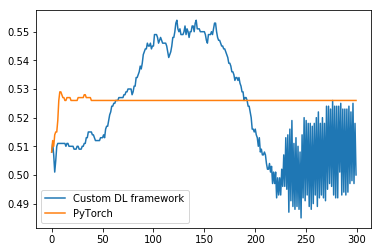

In [17]:
import matplotlib.pyplot as plt
plt.plot(test_acc_history_mnist, label='Custom DL framework')
plt.plot(test_acc_history_mnist_torch, label='PyTorch')
plt.legend()
plt.show()